# 5:Naive Bayes classification

Naive Bayes classifiers are built on Bayes' theorem, which we covered in some detail in the lecture. We are interested in finding the probability that data belongs to a class $L$ given some set of observed features $x$, we call this the _posterior_ distribution $P(L|x)$

Recall from the lecture that 

$$
P(L|x) = \frac{P(x|L)P(L)}{P(x)}
$$

Here $P(x|L)$ is called the _likelihood_ and is the probability of a observing a set of features given a particular label, $P(L)$ is the _prior_ and encodes what we already know about a system, for example if we were looking at an unbiased coin, then the $P(L)$ for heads would be 0.5, if we suspected foul play and a biased coin, we could adjust our prior accordingly. Finally $P(x)$ is called the _evidence_ - generally this is hard to compute, but luckily we are only actually interested in the ratio of probabilities for different labels, so we can cancel this term out.

$$
\frac{P(L_1|x)}{P(L_2|x)} = \frac{P(x|L_1)P(L_1)}{P(x|L_2)P(L_2)}
$$

we just require a way of calculating $P(x|L)$ - to do this we use a generative model, this is a model that generates new instances of the data.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

First let us set up some data to classify.

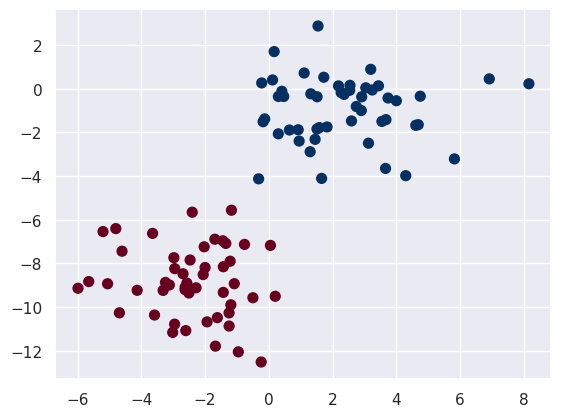

In [2]:
from sklearn.datasets import make_blobs
centres = [[-2, -9], [2, -1]]
X, y = make_blobs(100, 2, centers=centres, random_state=2, cluster_std=1.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')

Now we assign lables to this data

In [3]:
i0 = np.where(y == 0)[0]
i1 = np.where(y == 1)[0]
X0 = X[i0, :]
X1 = X[i1, :]

## Gaussian Naive Bayes

We choose Gaussian distributions as our generative models, so we say that the data can be described by two Gaussian distributions in each dimension. 

We can fit Gaussians to the distributions of each label in each dimension. The Gaussian distribution is fully characterised by its mean and its variance.

(array([0.11425437, 0.05712719, 0.11425437, 0.34276312, 0.05712719,
        0.3998903 , 0.25707234, 0.02856359, 0.02856359, 0.02856359]),
 array([-4.1239779 , -3.42378588, -2.72359386, -2.02340184, -1.32320982,
        -0.6230178 ,  0.07717422,  0.77736624,  1.47755826,  2.17775028,
         2.8779423 ]),
 <BarContainer object of 10 artists>)

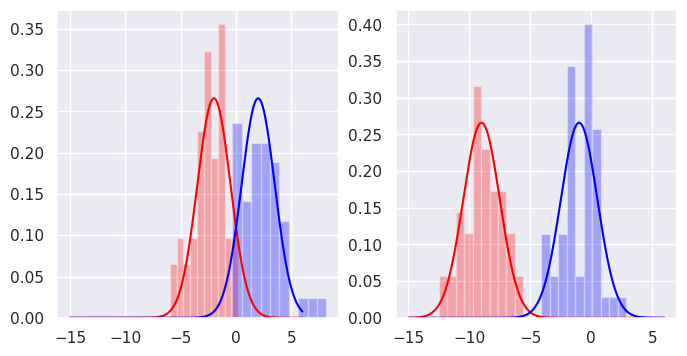

In [4]:
from scipy.stats import norm

fig, ax = plt.subplots(1, 2, figsize=(8, 4))
# Plot between -10 and 10 with .001 steps.
x_axis = np.arange(-15, 6, 0.001)
# Dist 1
ax[0].plot(x_axis, norm.pdf(x_axis,-2, 1.5), color='red')
ax[0].hist(X0[:, 0], density=True, color='red', alpha=0.3)
# Dist 2
ax[0].plot(x_axis, norm.pdf(x_axis, 2, 1.5), color='blue')
ax[0].hist(X1[:, 0], density=True, color='blue', alpha=0.3)

# Dist 1
ax[1].plot(x_axis, norm.pdf(x_axis,-9, 1.5), color='red')
ax[1].hist(X0[:, 1], density=True, color='red', alpha=0.3)
# Dist 2
ax[1].plot(x_axis, norm.pdf(x_axis, -1, 1.5), color='blue')
ax[1].hist(X1[:, 1], density=True, color='blue', alpha=0.3)

Now we introduce a new point that we would like to classify.

In [5]:
import scipy

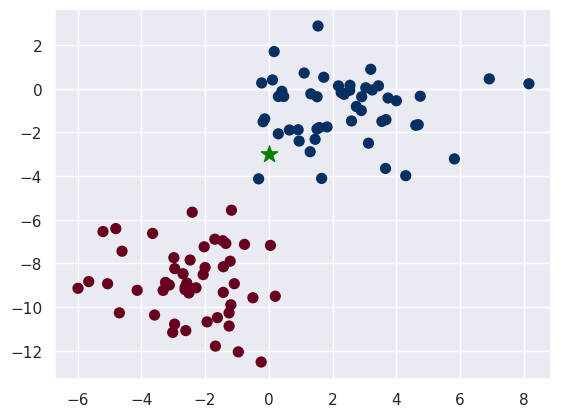

In [19]:
new_point = np.array([0, -3])
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
plt.scatter(new_point[0], new_point[1], c='green', s=150, marker='*')

We can look at where the new point sits with resepect to the distributions that we have fitted.

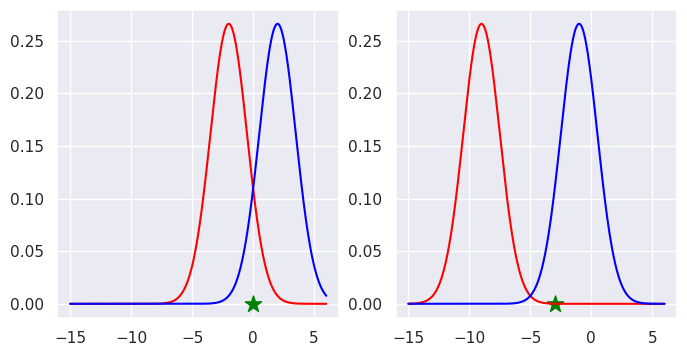

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
# Plot between -10 and 10 with .001 steps.
x_axis = np.arange(-15, 6, 0.001)
# Dist 1
ax[0].plot(x_axis, norm.pdf(x_axis,-2, 1.5), color='red')

# Dist 2
ax[0].plot(x_axis, norm.pdf(x_axis, 2, 1.5), color='blue')

ax[0].scatter(new_point[0], 0, c='green', s=150, marker='*')

# Dist 1
ax[1].plot(x_axis, norm.pdf(x_axis,-9, 1.5), color='red')

# Dist 2
ax[1].plot(x_axis, norm.pdf(x_axis, -1, 1.5), color='blue')

ax[1].scatter(new_point[1], 0, c='green', s=150, marker='*')


We can specify the parameters that describe the Gaussian distributions that we fitted to the original data.

With all of this in hand we are in a position whereby we can calculate

$\frac{P(L_1|x)}{P(L_2|x)} = \frac{P(x|L_1)P(L_1)}{P(x|L_2)P(L_2)}$

In our case $x = [x_1, x_2]$ as it is two dimensional. There is an additional nice property of Gaussian likelihoods, they are multiplicative so

$P([x_1, x_2]|L) = P(x_1|L)P(x_2|L)$

Our priors for both classes here are 0.5 as we do not assume any bias, so the P(L) terms above just cancel.

So:

$\frac{P(L_1|x)}{P(L_2|x)} = \frac{P(x_1|L_1)P(x_2|L1)}{P(x_1|L_2)P(x_2|L_2)}$

In [13]:
# Characterise Gaussians
mu_0 = -2
sig_0 = 1.5
mu_1 = 2
sig_1 = 1.5
mu_2 = -9
sig_2 = 1.5
mu_3 = -1
sig_3 = 1.5

x_1 = new_point[0]
x_2 = new_point[1]

### Calculate the log-likelihoods

In practice we calculate the log of the likelihoods as this is more numerically efficient.

$\log(p(y_0|x_1)p(y_0|x_2)) = \log(p(y_0|x_1)) + \log(p(y_0|x_2)) $

In [14]:
loglik_y0 = np.log(scipy.stats.norm.pdf(x_1, mu_0, sig_0)) + np.log(scipy.stats.norm.pdf(x_2, mu_2, sig_2))
loglik_y1 = np.log(scipy.stats.norm.pdf(x_1, mu_1, sig_1)) + np.log(scipy.stats.norm.pdf(x_2, mu_3, sig_3))

In [16]:
print('Log Likelihood of belonging to class 0:', loglik_y0)
print('Log Likelihood of belonging to class 1:', loglik_y1)

Likelihood of belonging to class 0: -11.537696171514563
Likelihood of belonging to class 1: -4.426585060403451


The log likelihood for class one, the blue class is higher.

## Save time with scikit!

Note - we need to reshape the data for using with the predict method. Currently new_point has a shape of 2x2, the predcit method expects a shape of Nx2x2 where N is the number of new points to predict, in this case just one.

In [20]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X, y)
ynew = model.predict(new_point.reshape(1, -1))

In [21]:
ynew

array([1])

In [22]:
model.predict_proba(new_point.reshape(1, -1))

array([[0.00209788, 0.99790212]])

[(-8.0, 8.0), (-15.0, 5.0)]

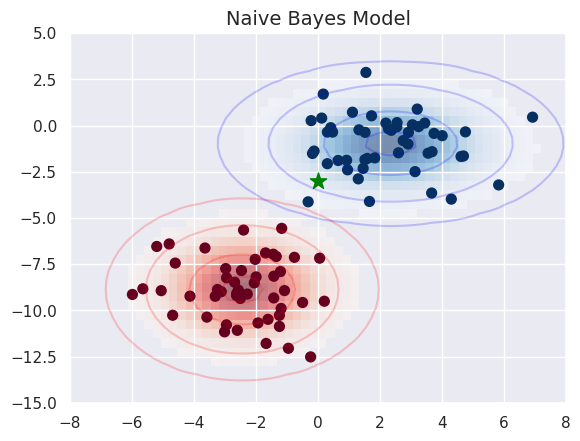

In [25]:
fig, ax = plt.subplots()

ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
ax.set_title('Naive Bayes Model', size=14)

xlim = (-8, 8)
ylim = (-15, 5)

xg = np.linspace(xlim[0], xlim[1], 60)
yg = np.linspace(ylim[0], ylim[1], 40)
xx, yy = np.meshgrid(xg, yg)
Xgrid = np.vstack([xx.ravel(), yy.ravel()]).T

for label, color in enumerate(['red', 'blue']):
    mask = (y == label)
    mu, std = X[mask].mean(0), X[mask].std(0)
    P = np.exp(-0.5 * (Xgrid - mu) ** 2 / std ** 2).prod(1)
    Pm = np.ma.masked_array(P, P < 0.03)
    ax.pcolorfast(xg, yg, Pm.reshape(xx.shape), alpha=0.5,
                  cmap=color.title() + 's')
    ax.contour(xx, yy, P.reshape(xx.shape),
               levels=[0.01, 0.1, 0.5, 0.9],
               colors=color, alpha=0.2)
    

ax.scatter(new_point[0], new_point[1], c='green', s=150, marker='*')   
ax.set(xlim=xlim, ylim=ylim)

Lets try a more ambiguous point

[(-8.0, 8.0), (-15.0, 5.0)]

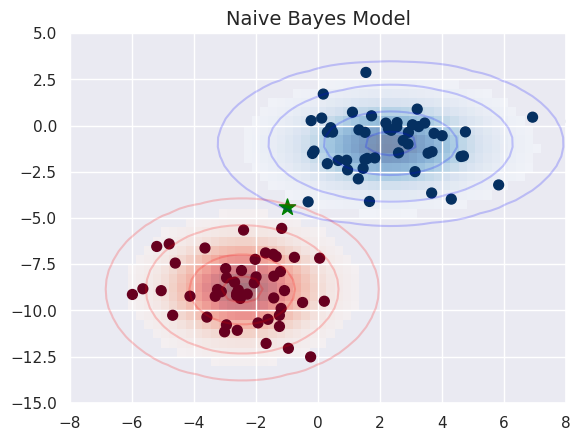

In [36]:
fig, ax = plt.subplots()

new_point_2 = np.array([-1., -4.4])

ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
ax.set_title('Naive Bayes Model', size=14)

xlim = (-8, 8)
ylim = (-15, 5)

xg = np.linspace(xlim[0], xlim[1], 60)
yg = np.linspace(ylim[0], ylim[1], 40)
xx, yy = np.meshgrid(xg, yg)
Xgrid = np.vstack([xx.ravel(), yy.ravel()]).T

for label, color in enumerate(['red', 'blue']):
    mask = (y == label)
    mu, std = X[mask].mean(0), X[mask].std(0)
    P = np.exp(-0.5 * (Xgrid - mu) ** 2 / std ** 2).prod(1)
    Pm = np.ma.masked_array(P, P < 0.03)
    ax.pcolorfast(xg, yg, Pm.reshape(xx.shape), alpha=0.5,
                  cmap=color.title() + 's')
    ax.contour(xx, yy, P.reshape(xx.shape),
               levels=[0.01, 0.1, 0.5, 0.9],
               colors=color, alpha=0.2)
    

ax.scatter(new_point_2[0], new_point_2[1], c='green', s=150, marker='*')   
ax.set(xlim=xlim, ylim=ylim)

In [37]:
print('Predicted class:', model.predict(new_point_2.reshape(1, -1)))
print('Predicted probabilities:', model.predict_proba(new_point_2.reshape(1, -1)))

Predicted class: [0]
Predicted probabilities: [[0.55448774 0.44551226]]
